In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

# Load the dataset, skipping the first row
for dirname, _, filenames in os.walk('../docs/Editted list.xlsx'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print("success")
df = pd.read_excel('../docs/Editted list.xlsx')
print(df.columns)
# Handle summary statistics
print("Summary Statistics:")
print(df.describe())

# Handle missing values
df = df.dropna()
print("Shape after dropping missing values:", df.shape)

# Identify key features and distributions
print("Data Columns:")
print(df.columns)
print(df.isnull().sum())
print(df.head())

success
Index(['Crop Name', 'Target Yield', 'Field Size', 'pH (water)',
       'Organic Carbon', 'Total Nitrogen', 'Phosphorus (M3)',
       'Potassium (exch.)', 'Soil moisture', 'Nitrogen (N) Need',
       'Phosphorus (P2O5) Need', 'Potassium (K2O) Need', 'Organic Matter Need',
       'Lime Need'],
      dtype='object')
Summary Statistics:
        Target Yield    Field Size   pH (water)  Organic Carbon  \
count    2379.000000   2379.000000  2379.000000     2379.000000   
mean    12392.184952      9.494210     6.175918       13.452795   
std     36106.107471    232.031645     0.647111       10.657324   
min         6.000000      0.013000     4.500000        1.600000   
25%       600.000000      0.500000     5.630000        4.650000   
50%      2000.000000      1.000000     6.150000        9.900000   
75%     10250.000000      2.000000     6.800000       19.200000   
max    863247.000000  10000.000000     7.200000       49.900000   

       Total Nitrogen  Phosphorus (M3)  Potassium (ex

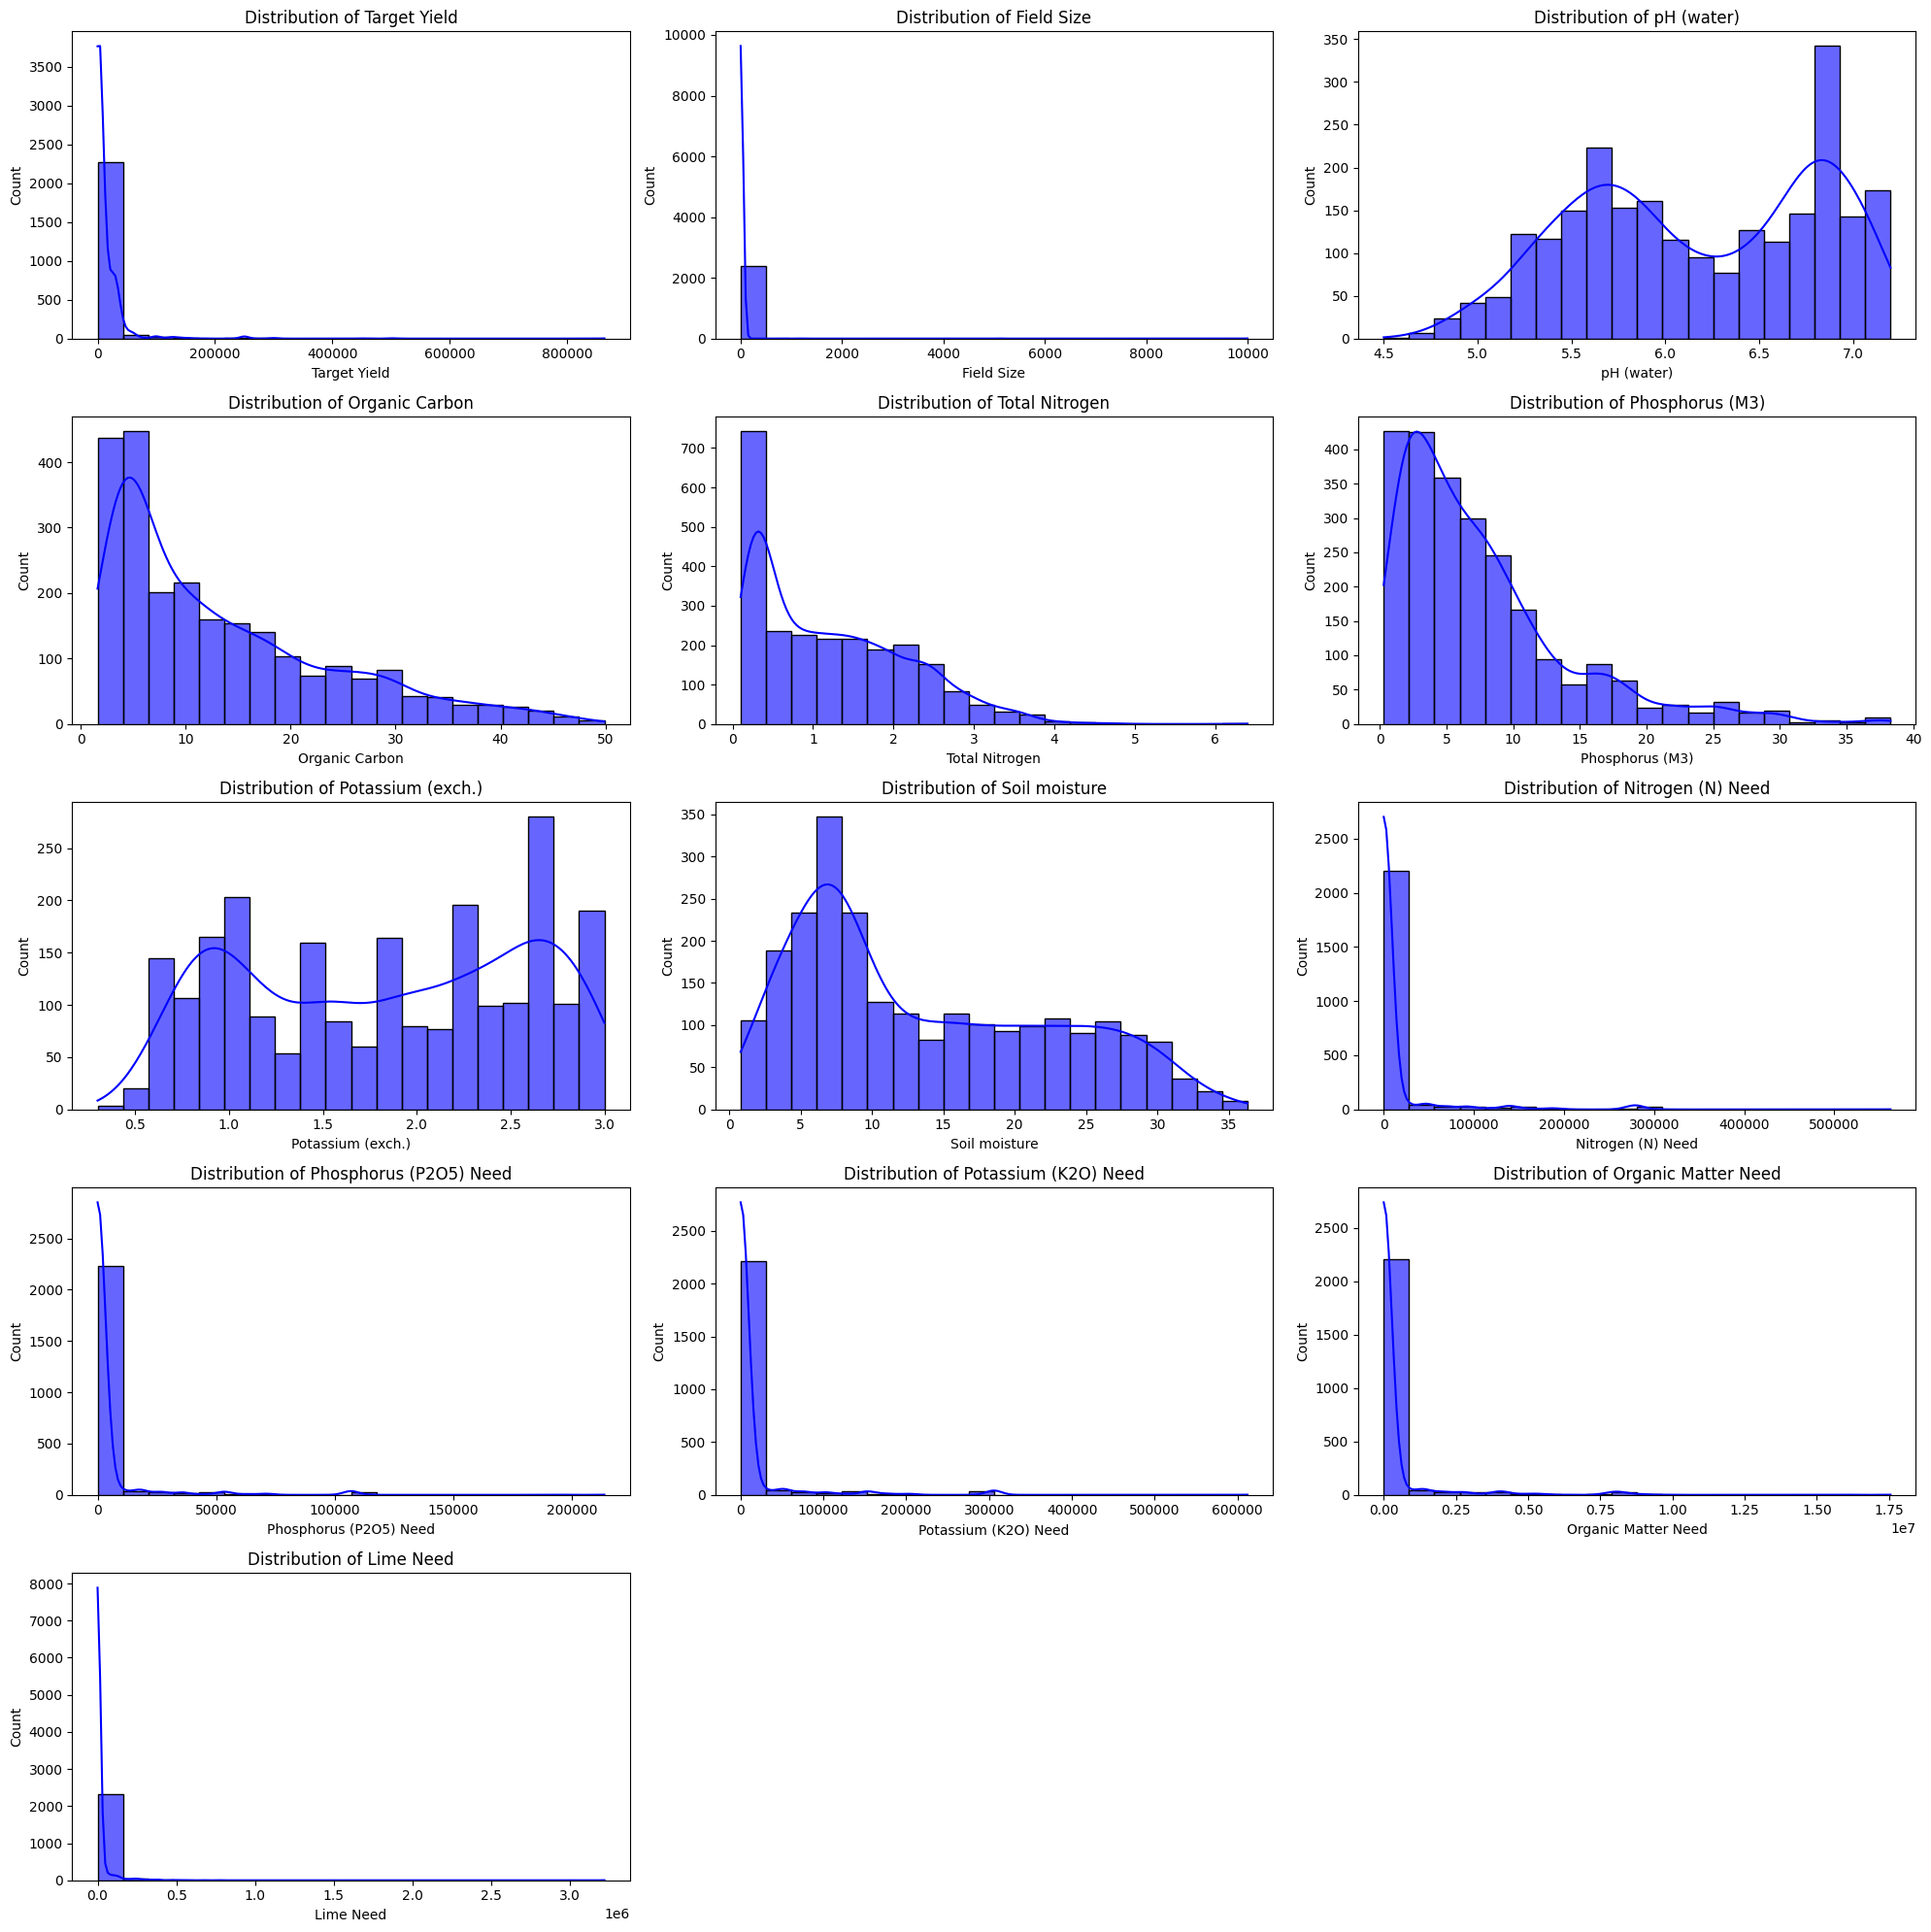

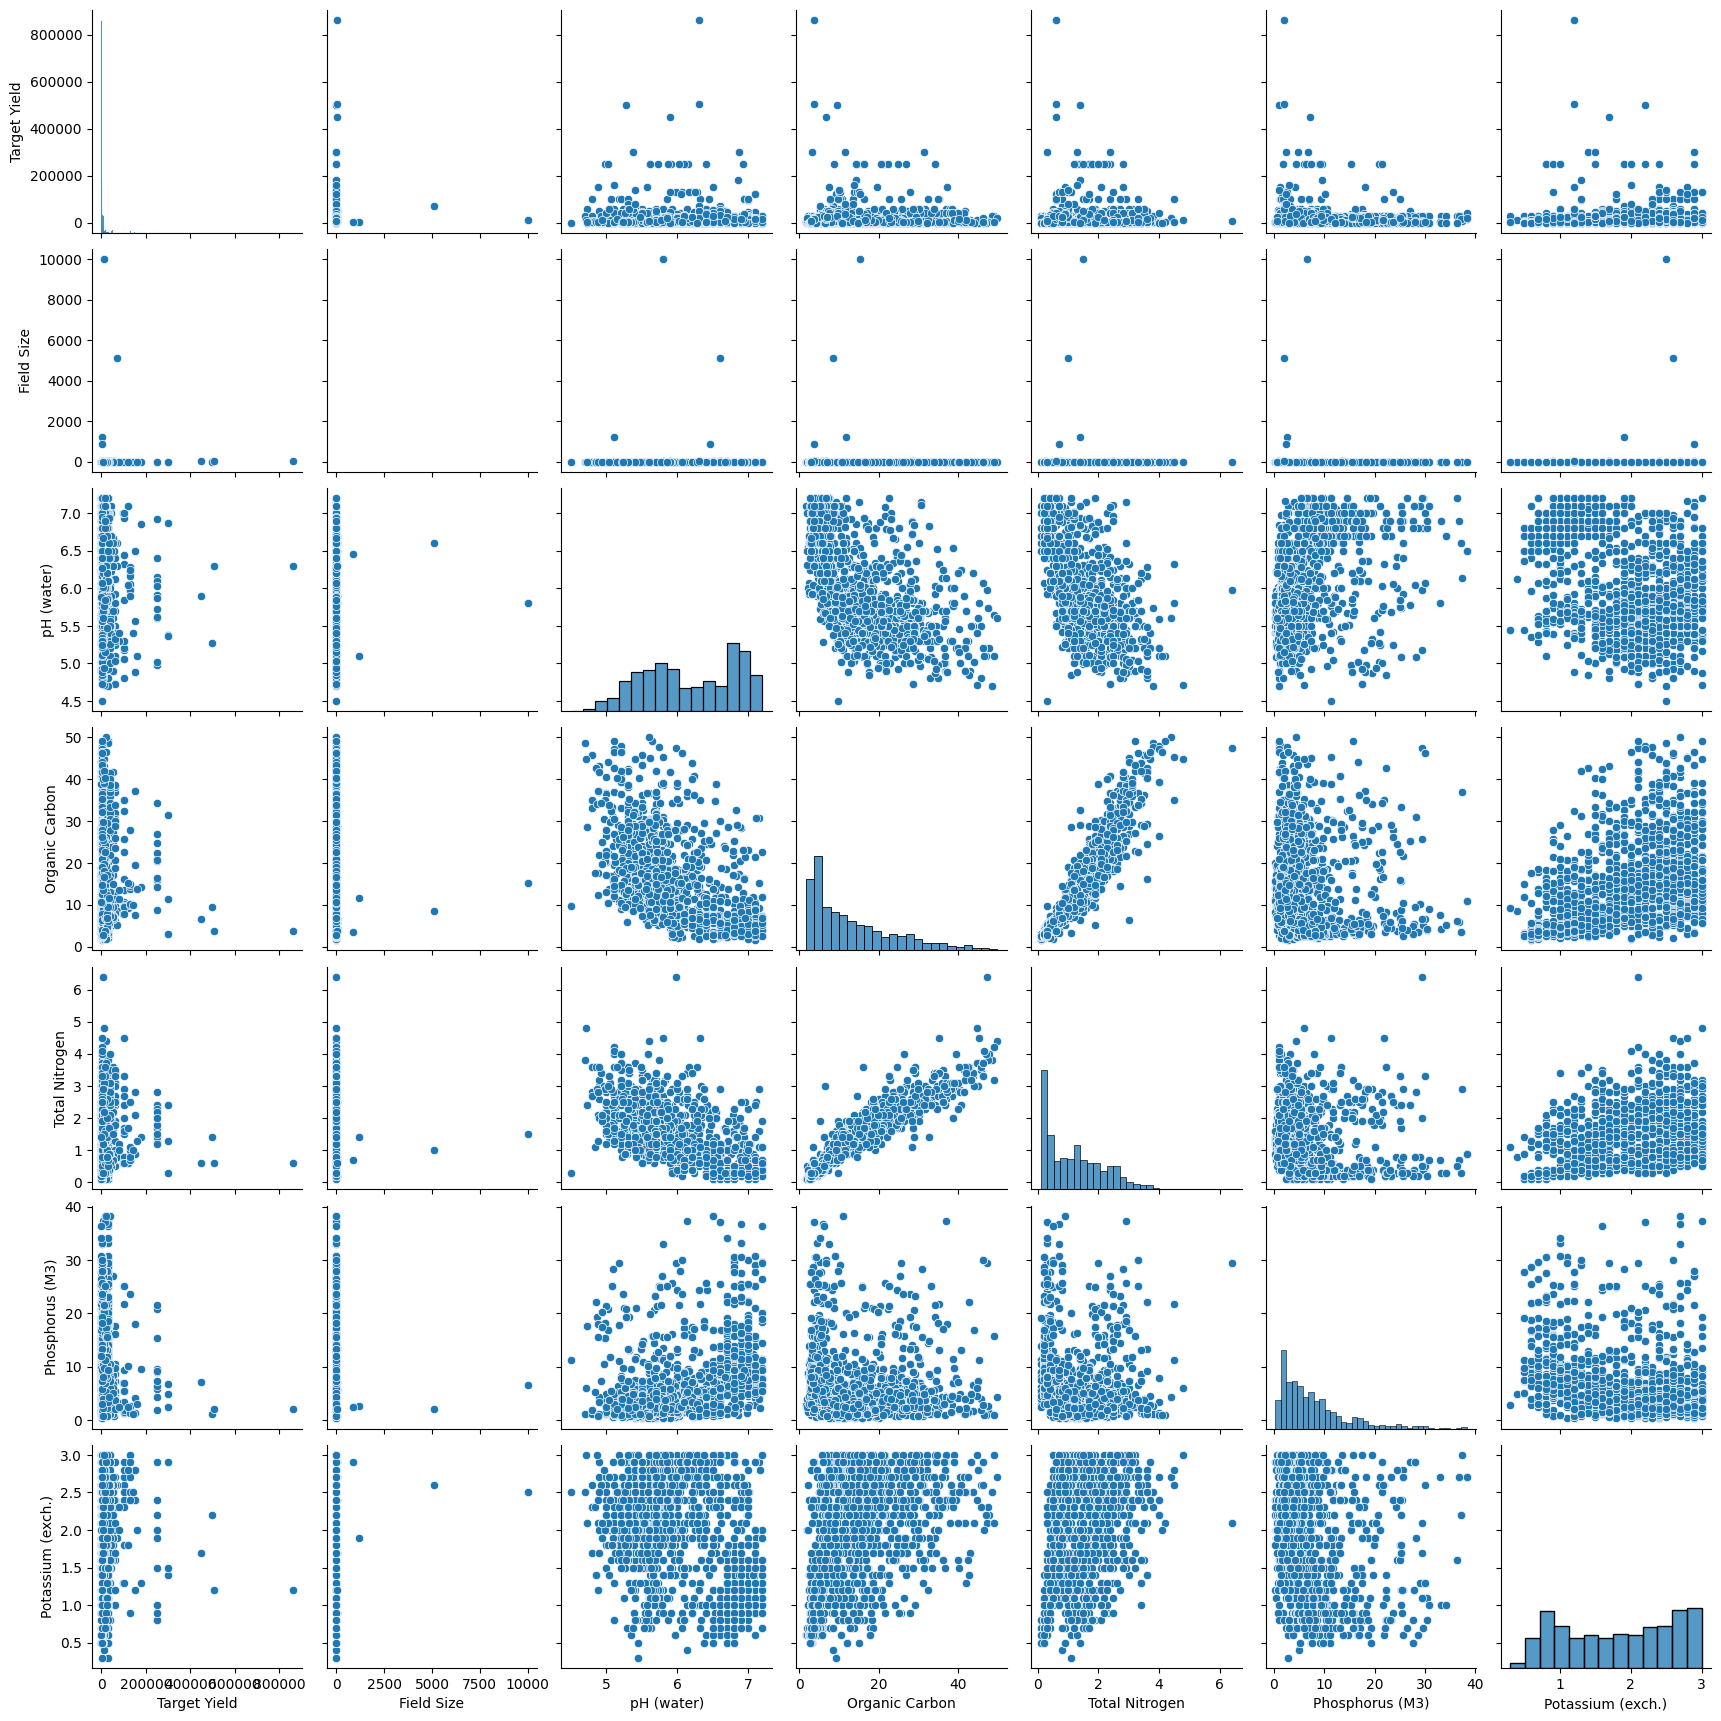

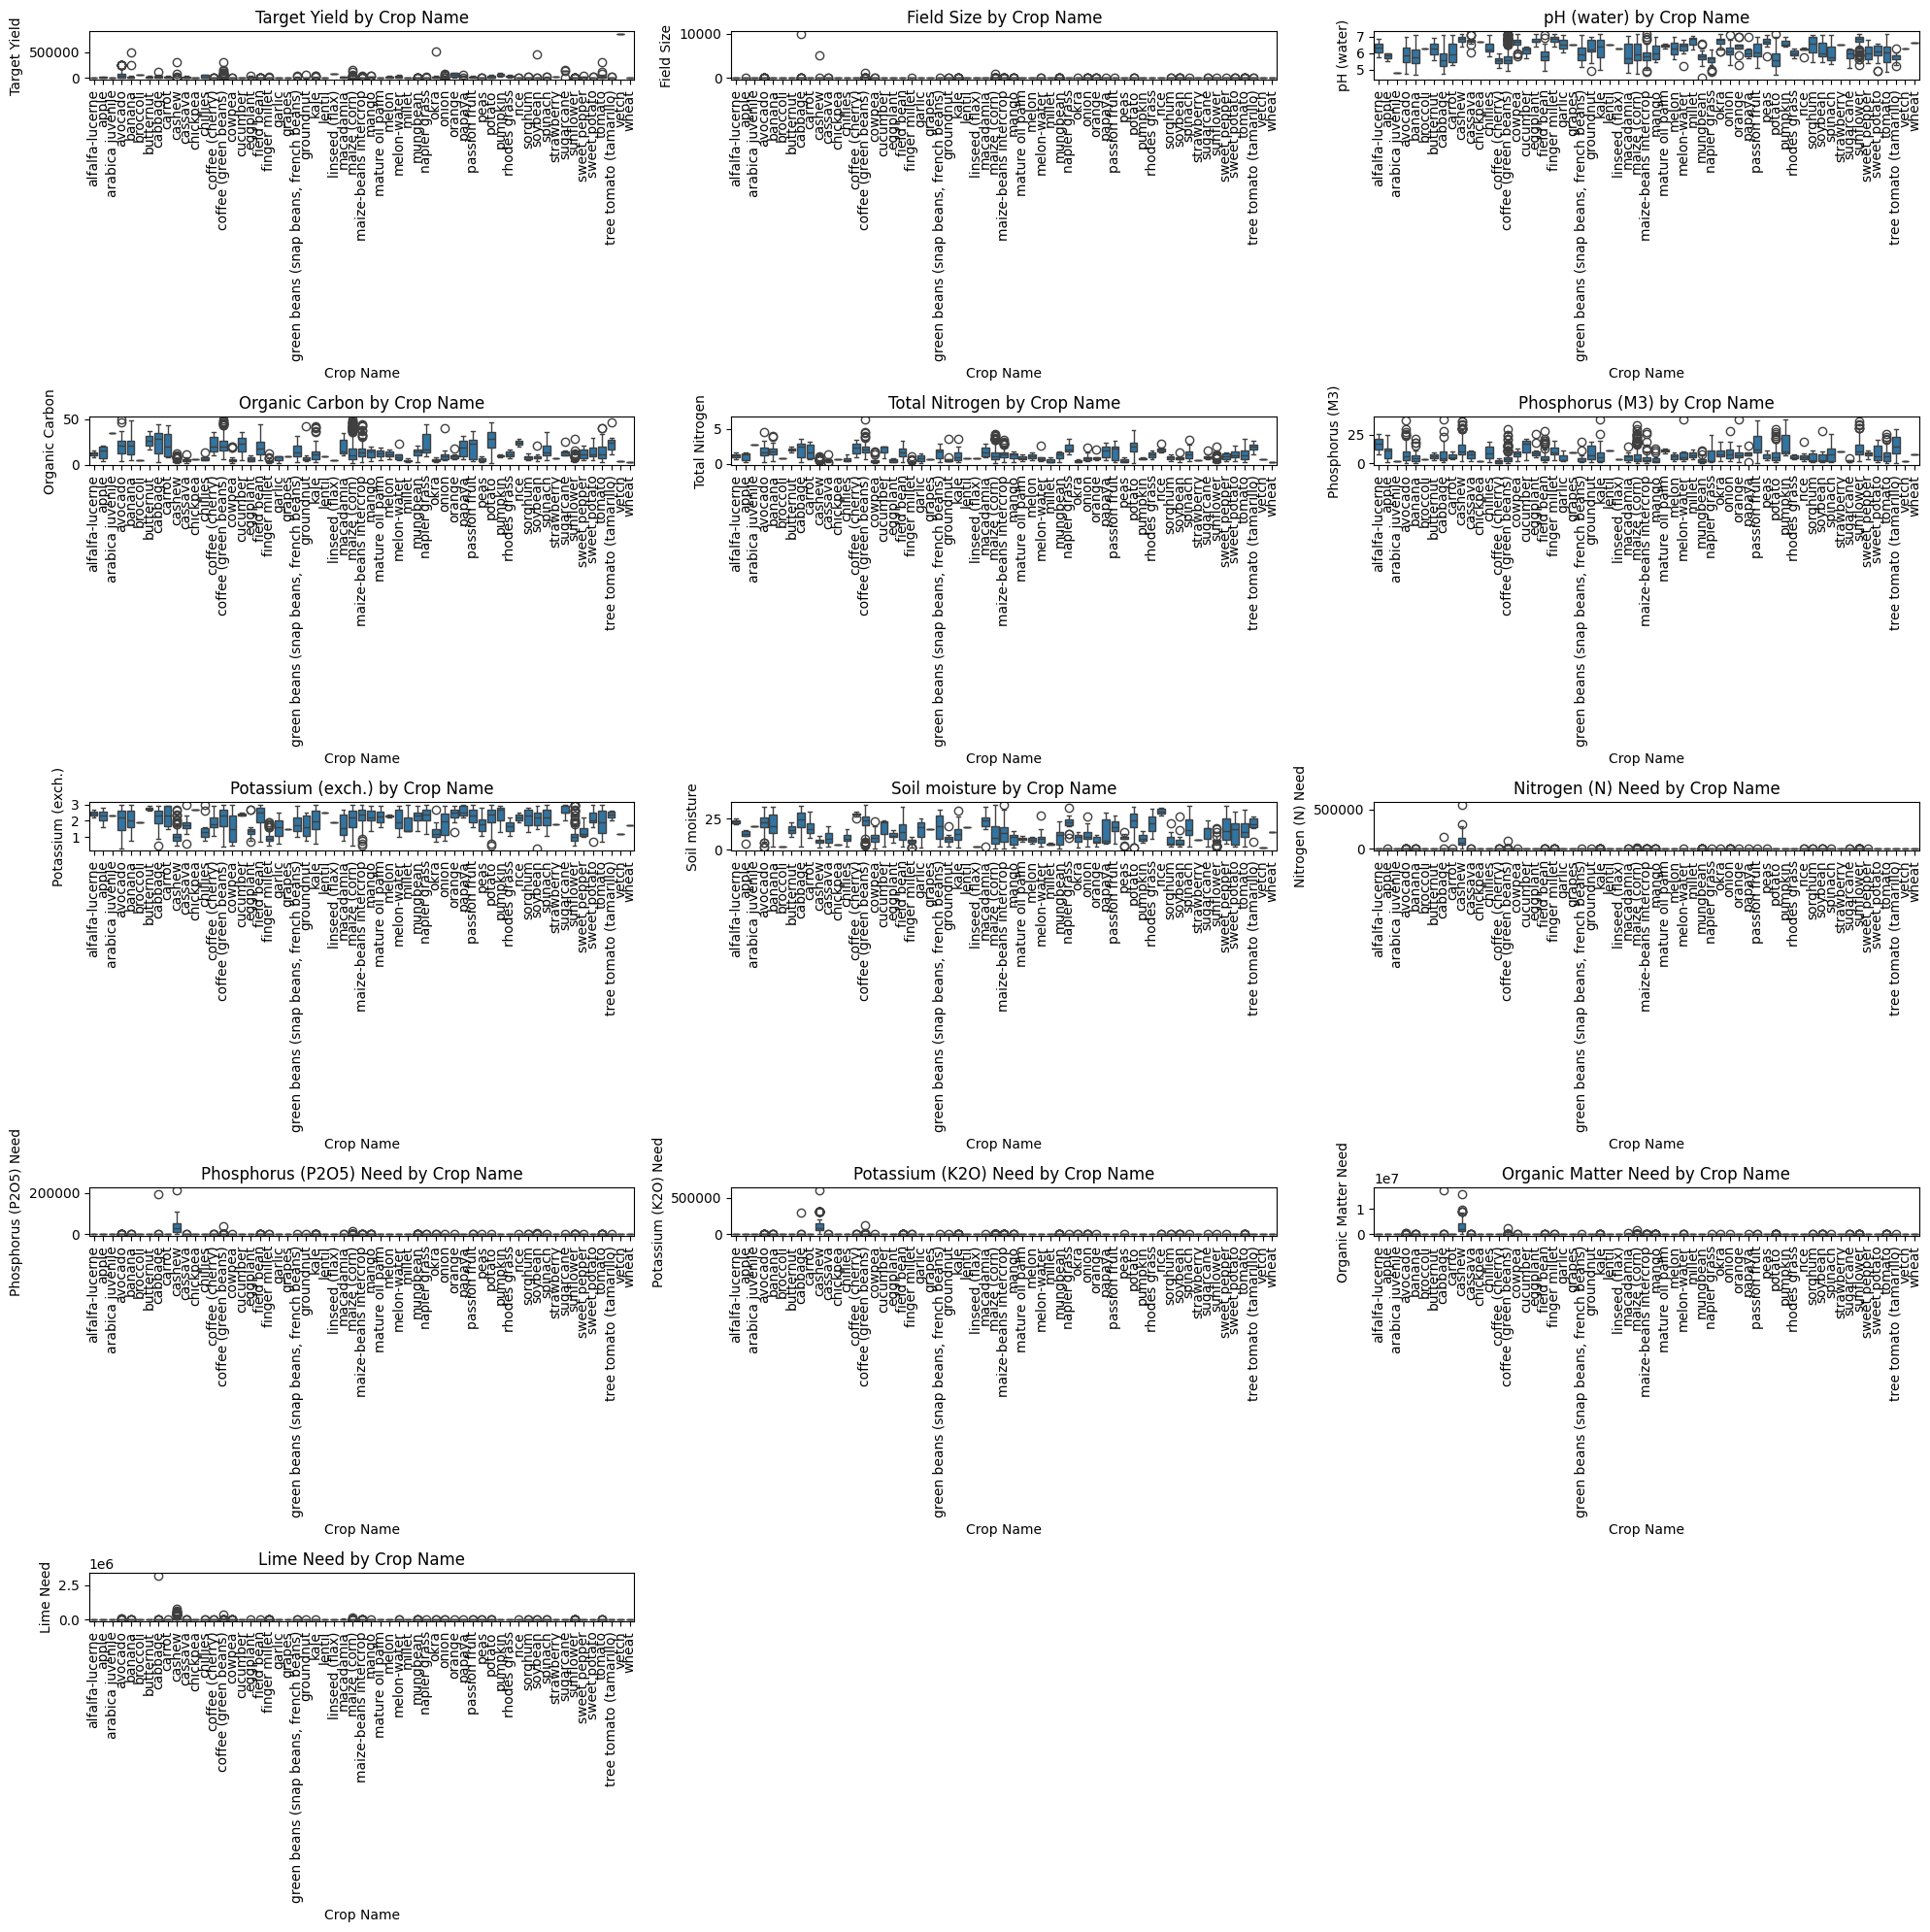

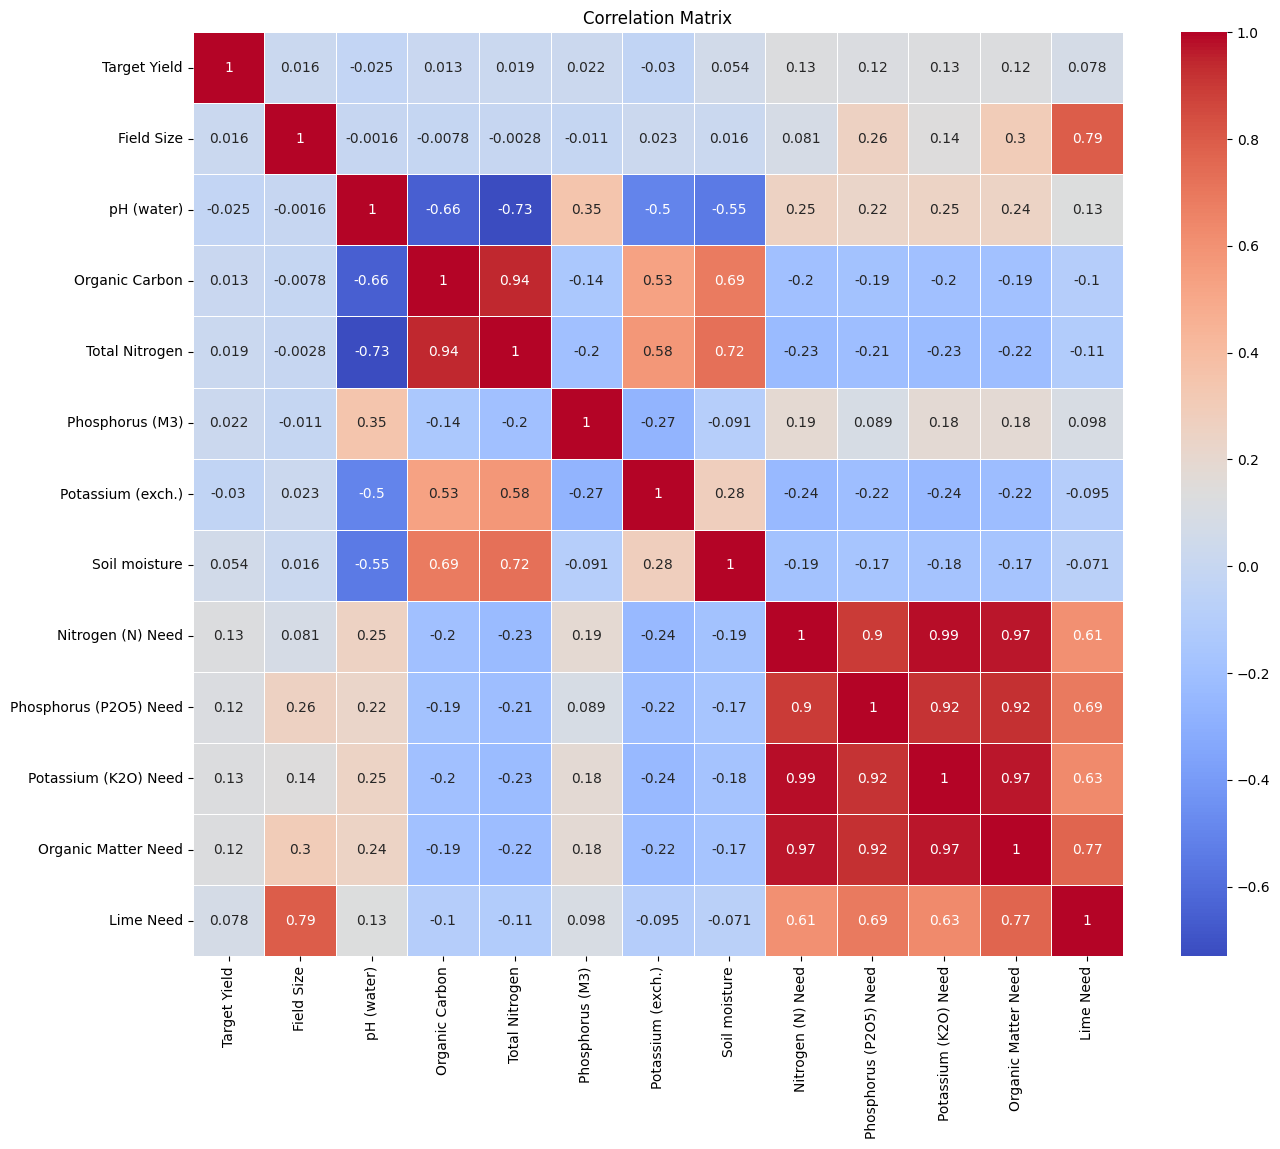

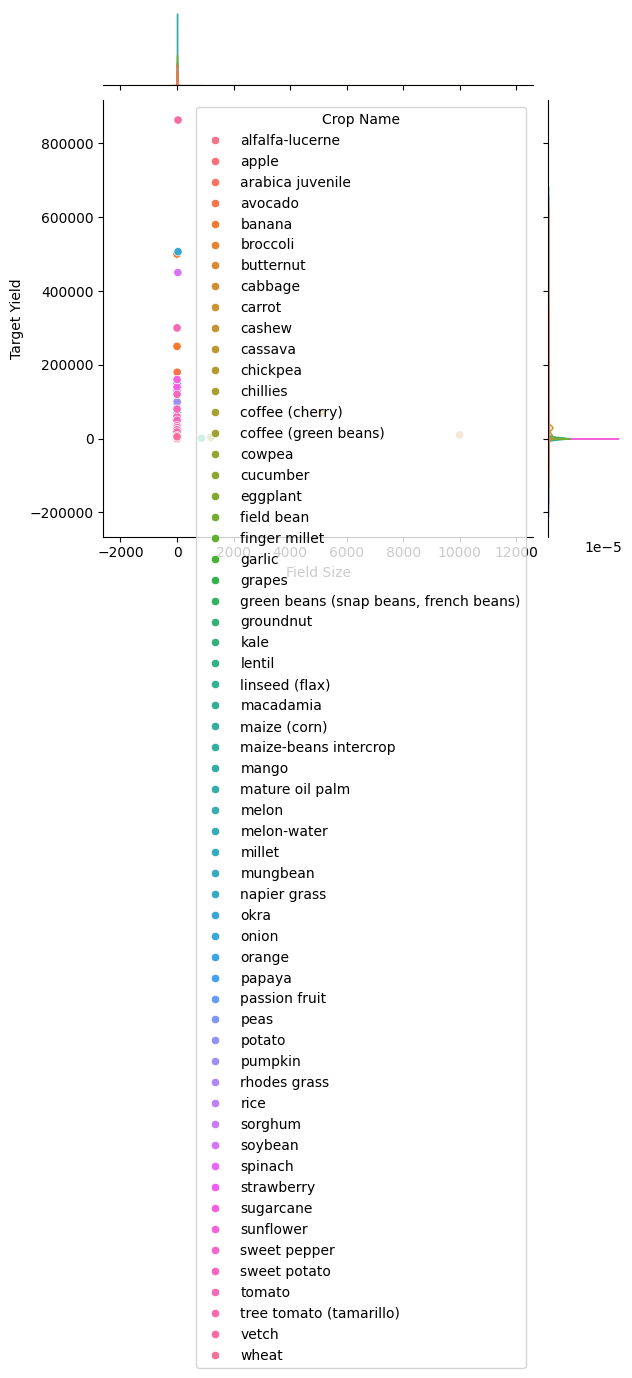

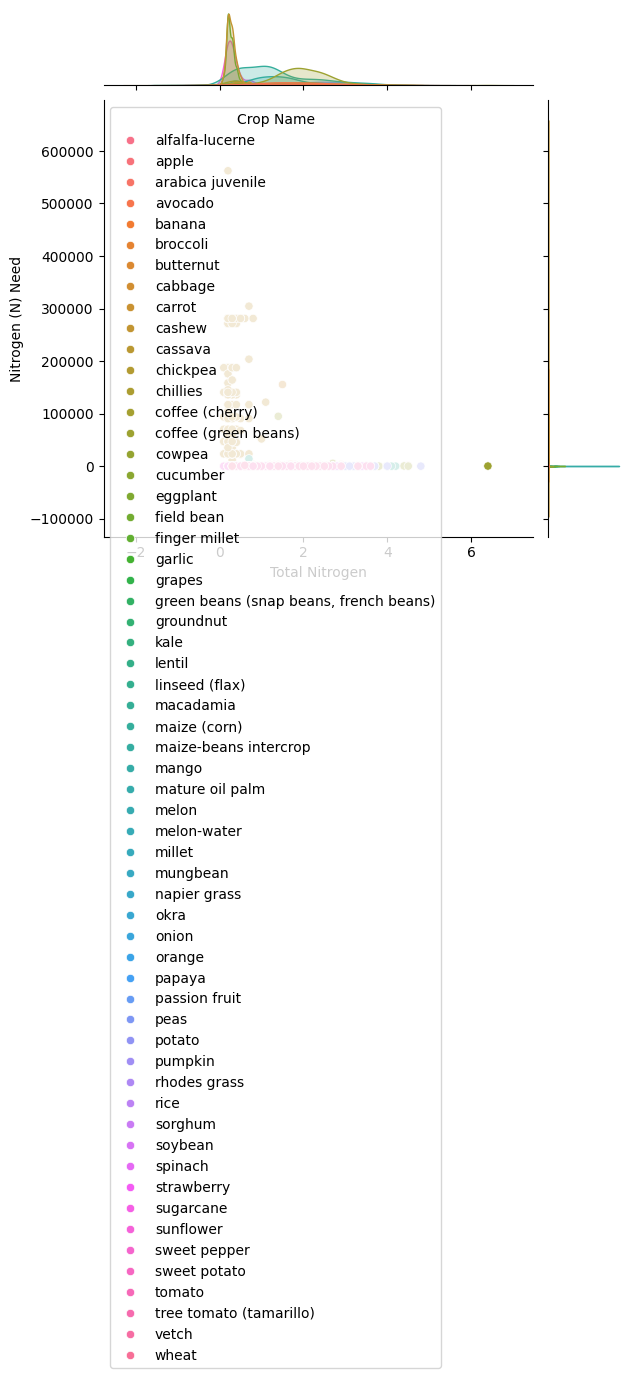

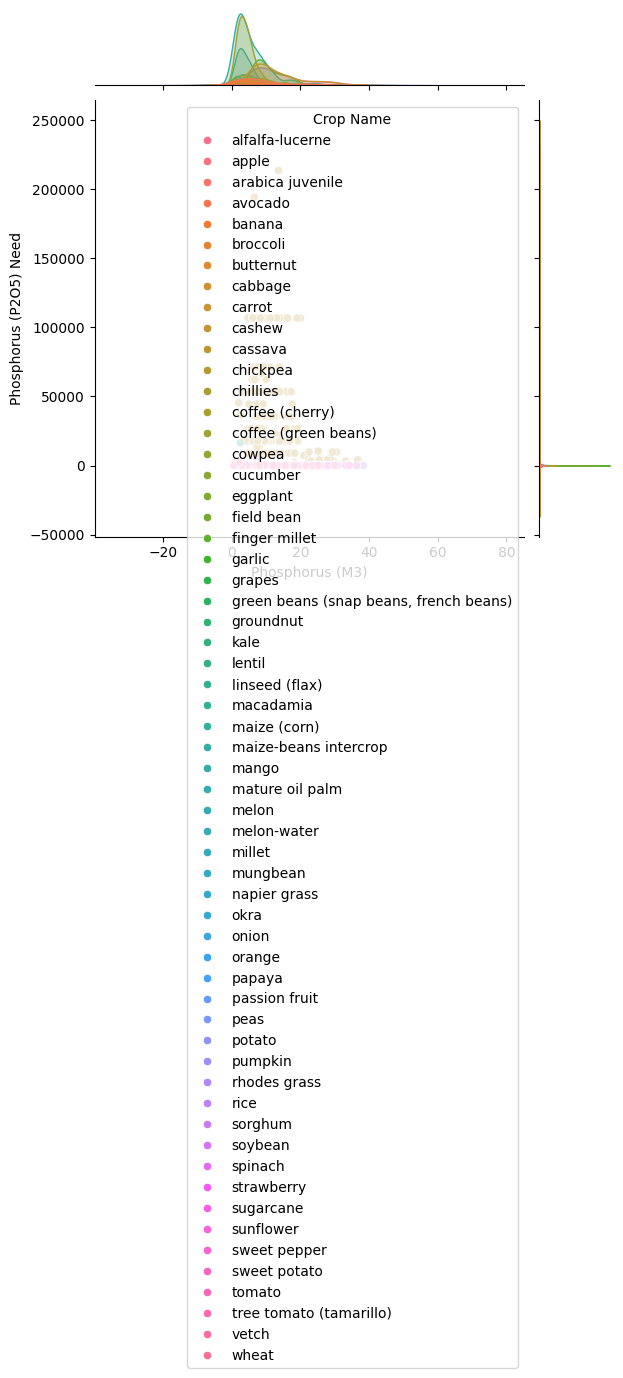

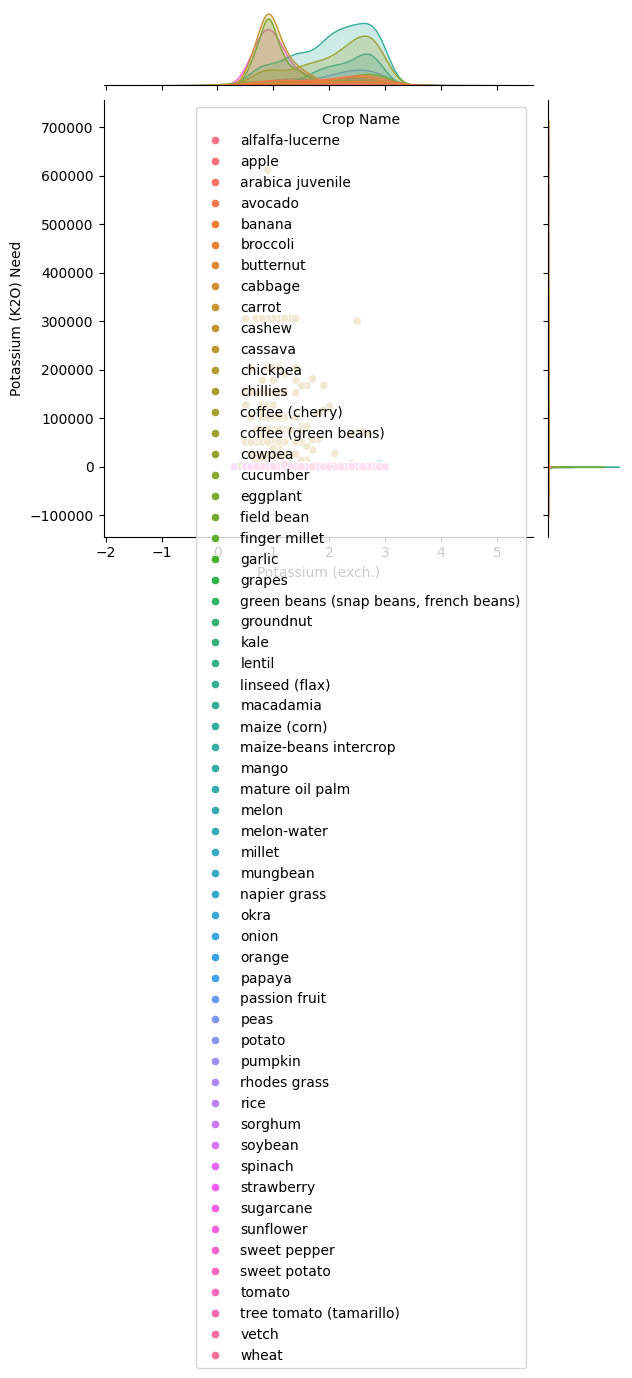

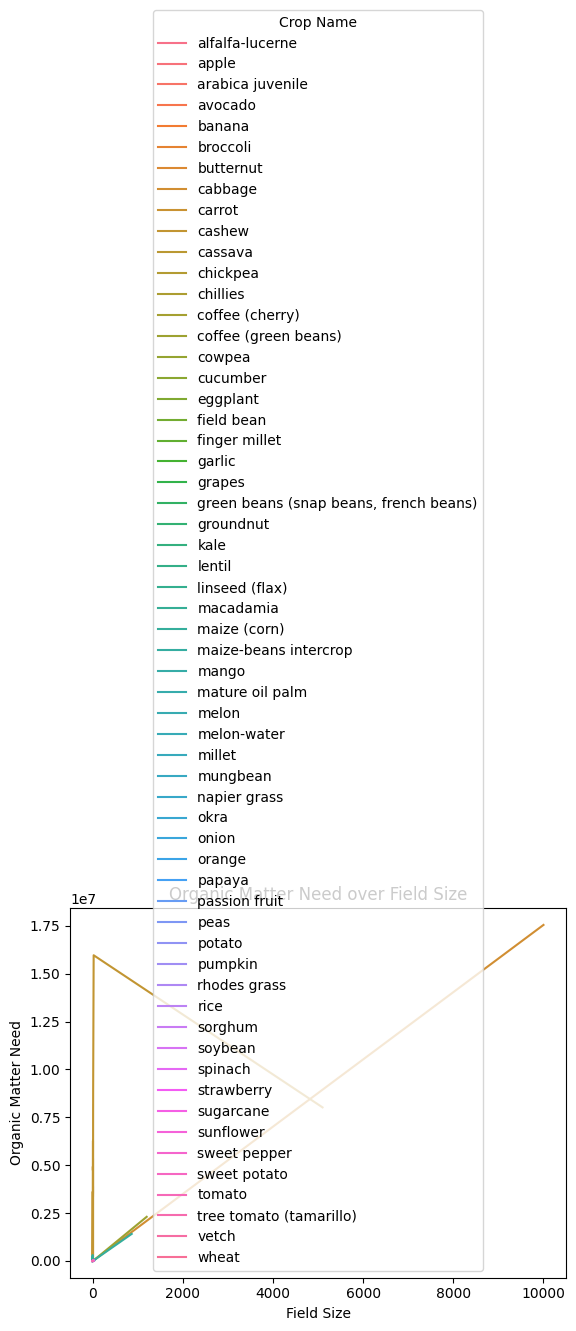

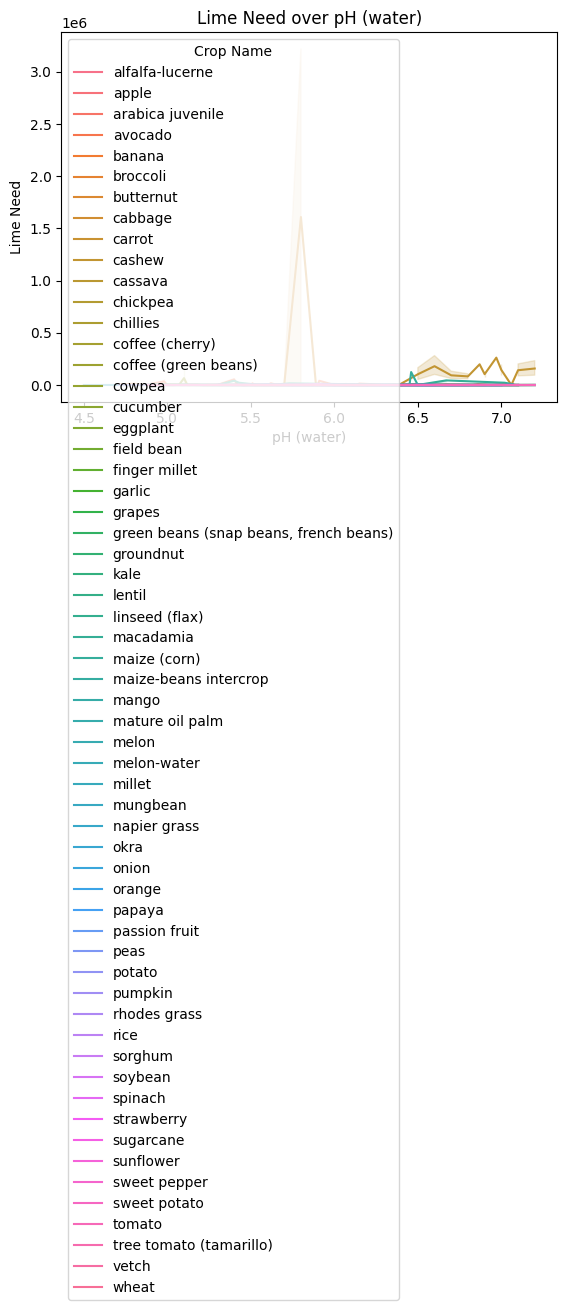

In [2]:
# Distribution of Continuous Variables
continuous_columns = ['Target Yield', 'Field Size', 'pH (water)', 'Organic Carbon', 'Total Nitrogen', 
                      'Phosphorus (M3)', 'Potassium (exch.)', 'Soil moisture', 
                      'Nitrogen (N) Need', 'Phosphorus (P2O5) Need', 'Potassium (K2O) Need', 
                      'Organic Matter Need', 'Lime Need']

plt.figure(figsize=(20, 20))
for i, col in enumerate(continuous_columns):
    plt.subplot(5, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=20, color='blue', alpha=0.6)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Pairplot to explore relationships between a few key variables
pairplot_columns = ['Target Yield', 'Field Size', 'pH (water)', 'Organic Carbon', 'Total Nitrogen', 
                    'Phosphorus (M3)', 'Potassium (exch.)']
sns.pairplot(df[pairplot_columns])
plt.show()

# Boxplot for 'Crop Name' vs Continuous Variables
plt.figure(figsize=(20, 20))
for i, col in enumerate(continuous_columns):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(x='Crop Name', y=col, data=df)
    plt.xticks(rotation=90)
    plt.title(f'{col} by Crop Name')
plt.tight_layout()
plt.show()

# Correlation matrix to understand relationships between variables
plt.figure(figsize=(15, 12))
corr_matrix = df[continuous_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Scatter plots for specific relationships
sns.jointplot(x="Field Size", y="Target Yield", data=df, kind='scatter', hue='Crop Name')
plt.show()

sns.jointplot(x="Total Nitrogen", y="Nitrogen (N) Need", data=df, kind='scatter', hue='Crop Name')
plt.show()

sns.jointplot(x="Phosphorus (M3)", y="Phosphorus (P2O5) Need", data=df, kind='scatter', hue='Crop Name')
plt.show()

sns.jointplot(x="Potassium (exch.)", y="Potassium (K2O) Need", data=df, kind='scatter', hue='Crop Name')
plt.show()

# Lineplot for 'Organic Matter Need' over 'Field Size'
sns.lineplot(data=df, x='Field Size', y='Organic Matter Need', hue='Crop Name')
plt.title('Organic Matter Need over Field Size')
plt.show()

# Lineplot for 'Lime Need' over 'pH (water)'
sns.lineplot(data=df, x='pH (water)', y='Lime Need', hue='Crop Name')
plt.title('Lime Need over pH (water)')
plt.show()

In [3]:
import pandas as pd

# Load your dataset from an Excel file, starting from the second row
df = pd.read_excel('/home/space/Project01/docs/Editted list.xlsx')  # Replace with the actual path

# Print the actual column names to inspect them
print("Columns in the dataset:")
print(df.columns)

# Define the input features and output target columns
features = ['Crop Name', 'Target Yield', 'Field Size',
            'pH (water)', 'Organic Carbon', 'Total Nitrogen', 'Phosphorus (M3)',
            'Potassium (exch.)', 'Soil moisture']
output_columns = ['Nitrogen (N) Need', 'Phosphorus (P2O5) Need', 'Potassium (K2O) Need']

# Ensure all specified columns exist in the DataFrame
missing_features = [col for col in features if col not in df.columns]
missing_outputs = [col for col in output_columns if col not in df.columns]

if missing_features:
    print("The following input features are missing from the dataset:", missing_features)
if missing_outputs:
    print("The following output columns are missing from the dataset:", missing_outputs)

# Check for similar column names if any columns are missing
if missing_features or missing_outputs:
    print("Attempting to find similar column names for missing columns...")
    all_columns = df.columns
    similar_features = {col: [c for c in all_columns if col.lower() in c.lower()] for col in features if col not in all_columns}
    similar_outputs = {col: [c for c in all_columns if col.lower() in c.lower()] for col in output_columns if col not in all_columns}
    print("Similar input feature columns:", similar_features)
    print("Similar output columns:", similar_outputs)

# Proceed only if all necessary columns are present
if not missing_features and not missing_outputs:
    # Input features
    X = df[features].copy()  # Create a copy to avoid modifying the original DataFrame
    X.fillna(0, inplace=True)

    # Output targets
    y = df[output_columns].copy()  # Create a copy to avoid modifying the original DataFrame

    # Aggregate output columns to have only one row per sample
    y = y.mean(axis=1)  # Taking the mean value across columns

    # One-hot encode categorical features
    X = pd.get_dummies(X, columns=['Crop Name'])  

    # Print lengths of X, y, and df to debug
    print("Length of X:", len(X))
    print("Length of y:", len(y))
    print("Length of df:", len(df))

    # Check if X and y have a consistent number of samples
    if len(X) == len(y):
        print("X and y have a consistent number of samples.")
        print("Number of samples:", len(X))
    else:
        print("X and y have an inconsistent number of samples.")
else:
    print("Please ensure all necessary columns are present in the dataset before proceeding.")






Columns in the dataset:
Index(['Crop Name', 'Target Yield', 'Field Size', 'pH (water)',
       'Organic Carbon', 'Total Nitrogen', 'Phosphorus (M3)',
       'Potassium (exch.)', 'Soil moisture', 'Nitrogen (N) Need',
       'Phosphorus (P2O5) Need', 'Potassium (K2O) Need', 'Organic Matter Need',
       'Lime Need'],
      dtype='object')
Length of X: 2379
Length of y: 2379
Length of df: 2379
X and y have a consistent number of samples.
Number of samples: 2379


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Check if X and y have the same number of samples
if len(X) != len(y):
    raise ValueError("X and y have inconsistent numbers of samples")

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)




In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset from an Excel file, starting from the second row
df = pd.read_excel('/home/space/Project01/docs/Editted list.xlsx')  # Replace with the actual path

# Print the actual column names to inspect them
print("Columns in the dataset:")
print(df.columns)

# Define the input features and output target columns
features = ['Crop Name', 'Target Yield', 'Field Size',
            'pH (water)', 'Organic Carbon', 'Total Nitrogen', 'Phosphorus (M3)',
            'Potassium (exch.)', 'Soil moisture']
output_columns = ['Nitrogen (N) Need', 'Phosphorus (P2O5) Need', 'Potassium (K2O) Need']

# Ensure all specified columns exist in the DataFrame
missing_features = [col for col in features if col not in df.columns]
missing_outputs = [col for col in output_columns if col not in df.columns]

if missing_features or missing_outputs:
    print("Missing features:", missing_features)
    print("Missing output columns:", missing_outputs)
else:
    # Input features
    X = df[features].copy()
    y = df[output_columns].copy()

    # Combine X and y to drop rows with NaN values in either
    combined = pd.concat([X, y], axis=1)
    combined.dropna(inplace=True)

    # Separate X and y again after dropping NaNs
    X = combined[features]
    y = combined[output_columns]

    # One-hot encode categorical features
    X = pd.get_dummies(X, columns=['Crop Name'])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

    # If you really need a confusion matrix-like output for regression, you can bin the predicted and true values
    # into categories and then use sklearn's confusion_matrix function. This is not typical for regression.
    # from sklearn.metrics import confusion_matrix

    # Define bin edges
    # bins = [0, 50, 100, 150, 200]  # Example bin edges, adjust according to your data
    # y_test_binned = pd.cut(y_test.values.ravel(), bins=bins, labels=False)
    # y_pred_binned = pd.cut(y_pred.ravel(), bins=bins, labels=False)

    # Confusion matrix
    # cm = confusion_matrix(y_test_binned, y_pred_binned)
    # print("Confusion Matrix:")
    # print(cm)




Columns in the dataset:
Index(['Crop Name', 'Target Yield', 'Field Size', 'pH (water)',
       'Organic Carbon', 'Total Nitrogen', 'Phosphorus (M3)',
       'Potassium (exch.)', 'Soil moisture', 'Nitrogen (N) Need',
       'Phosphorus (P2O5) Need', 'Potassium (K2O) Need', 'Organic Matter Need',
       'Lime Need'],
      dtype='object')
Mean Squared Error: 158434704.63007665
R^2 Score: 0.9197214708338072


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load your dataset from an Excel file, starting from the second row
df = pd.read_excel('/home/space/Project01/docs/Editted list.xlsx')  # Replace with the actual path

# Print the actual column names to inspect them
print("Columns in the dataset:")
print(df.columns)

# Define the input features and output target columns
features = ['Crop Name', 'Target Yield', 'Field Size',
            'pH (water)', 'Organic Carbon', 'Total Nitrogen', 'Phosphorus (M3)',
            'Potassium (exch.)', 'Soil moisture']
output_columns = ['Nitrogen (N) Need', 'Phosphorus (P2O5) Need', 'Potassium (K2O) Need']

# Ensure all specified columns exist in the DataFrame
missing_features = [col for col in features if col not in df.columns]
missing_outputs = [col for col in output_columns if col not in df.columns]

if missing_features or missing_outputs:
    print("Missing features:", missing_features)
    print("Missing output columns:", missing_outputs)
else:
    # Input features
    X = df[features].copy()
    y = df[output_columns].copy()

    # Combine X and y to drop rows with NaN values in either
    combined = pd.concat([X, y], axis=1)
    combined.dropna(inplace=True)

    # Separate X and y again after dropping NaNs
    X = combined[features]
    y = combined[output_columns]

    # One-hot encode categorical features
    X = pd.get_dummies(X, columns=['Crop Name'])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Save the model to a file
    model_filename = '/home/space/Project01/docs/random_forest_model01.joblib'
    joblib.dump(model, model_filename)
    print(f"Model saved to {model_filename}")


    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

    # Function to make predictions for new data
    def predict_nutrient_needs(model, input_data):
        input_df = pd.DataFrame(input_data)
        input_df = pd.get_dummies(input_df, columns=['Crop Name'])
        for col in X.columns:
            if col not in input_df.columns:
                input_df[col] = 0  # Add missing columns with default value 0
        input_df = input_df[X.columns]  # Ensure the same column order as training data
        predictions = model.predict(input_df)
        return predictions

    # Example input data for prediction
    new_data = {
        'Crop Name': ['apple'],  # Example crop name
        'Target Yield': [1200.0],   # Example target yield
        'Field Size': [1.0],     # Example field size
        'pH (water)': [5.76],     # Example pH
        'Organic Carbon': [12.9], # Example organic carbon
        'Total Nitrogen': [1.1], # Example total nitrogen
        'Phosphorus (M3)': [1.2], # Example phosphorus
        'Potassium (exch.)': [1.7], # Example potassium
        'Soil moisture': [11.4]  # Example soil moisture
    }

    # Make predictions for the new input data
    predictions = predict_nutrient_needs(model, new_data)

    print("Predicted nutrient needs:")
    print(predictions)


Columns in the dataset:
Index(['Crop Name', 'Target Yield', 'Field Size', 'pH (water)',
       'Organic Carbon', 'Total Nitrogen', 'Phosphorus (M3)',
       'Potassium (exch.)', 'Soil moisture', 'Nitrogen (N) Need',
       'Phosphorus (P2O5) Need', 'Potassium (K2O) Need', 'Organic Matter Need',
       'Lime Need'],
      dtype='object')
Model saved to /home/space/Project01/docs/random_forest_model01.joblib
Mean Squared Error: 158434704.63007665
R^2 Score: 0.9197214708338072
Predicted nutrient needs:
[[ 9.78 16.62 19.63]]



Model: Random Forest
Target Variable: Nitrogen (N) Need
Mean Squared Error: 210376242.6559574
R^2 Score: 0.925202379890647

Target Variable: Phosphorus (P2O5) Need
Mean Squared Error: 27909523.986779418
R^2 Score: 0.9203643149419025

Target Variable: Potassium (K2O) Need
Mean Squared Error: 228839943.64629892
R^2 Score: 0.9276899246265105


Model: Gradient Boosting
Target Variable: Nitrogen (N) Need
Mean Squared Error: 256238491.0541513
R^2 Score: 0.9088964178212567

Target Variable: Phosphorus (P2O5) Need
Mean Squared Error: 31461214.44022437
R^2 Score: 0.9102300932866578

Target Variable: Potassium (K2O) Need
Mean Squared Error: 277547513.6098543
R^2 Score: 0.9122990448735947



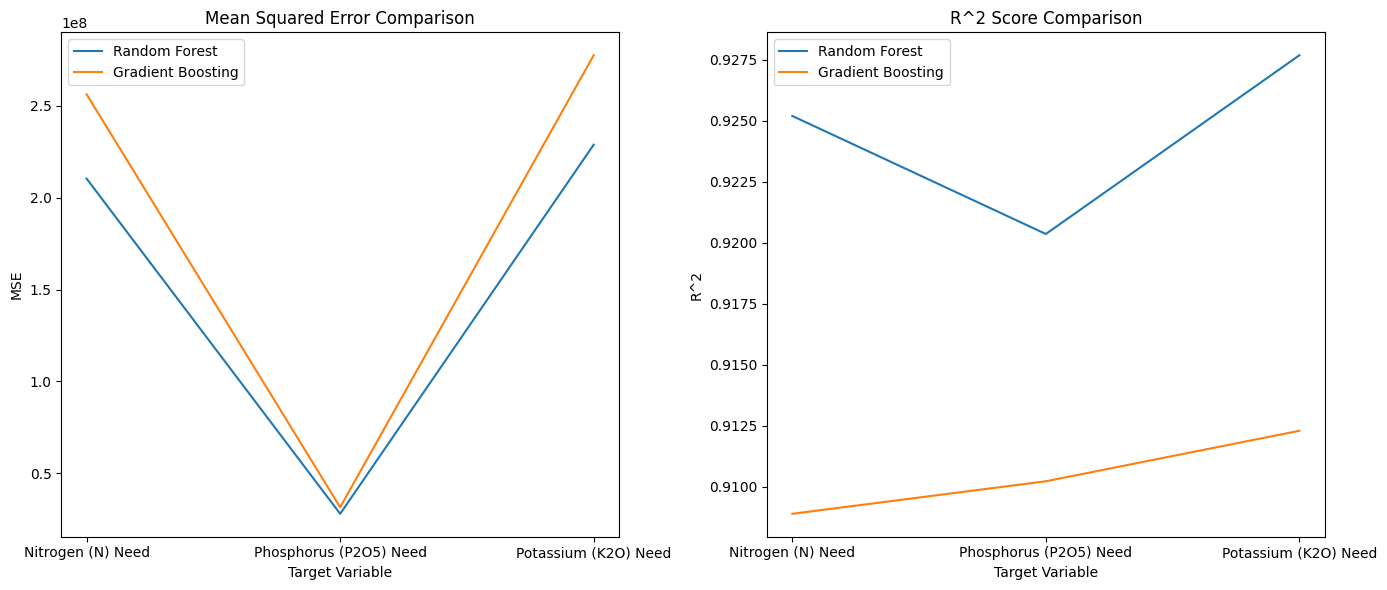

Predicted nutrient needs (Random Forest):
[8.43]
Predicted nutrient needs (Gradient Boosting):
[107.37072757]


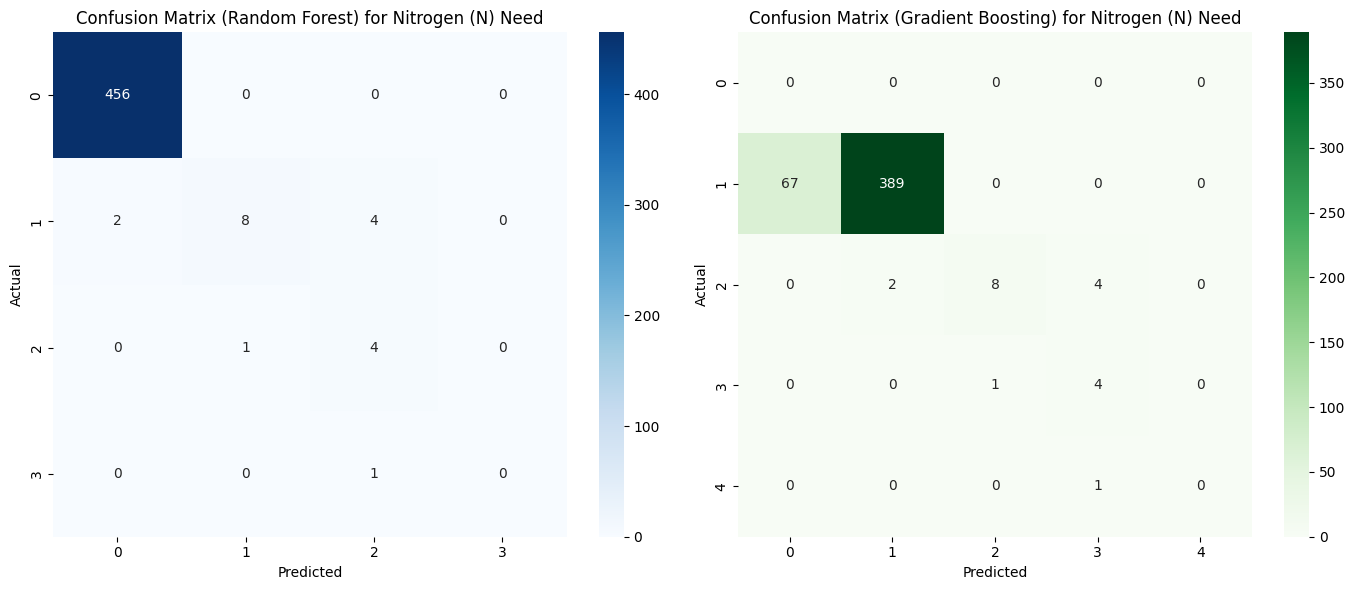

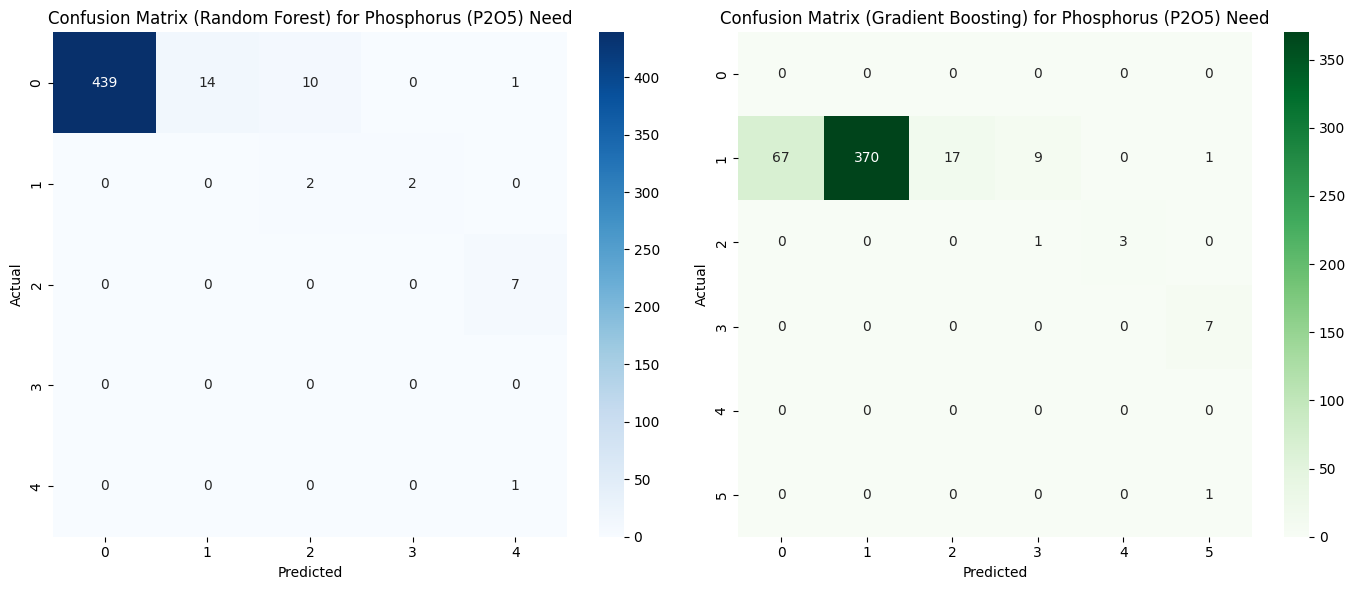

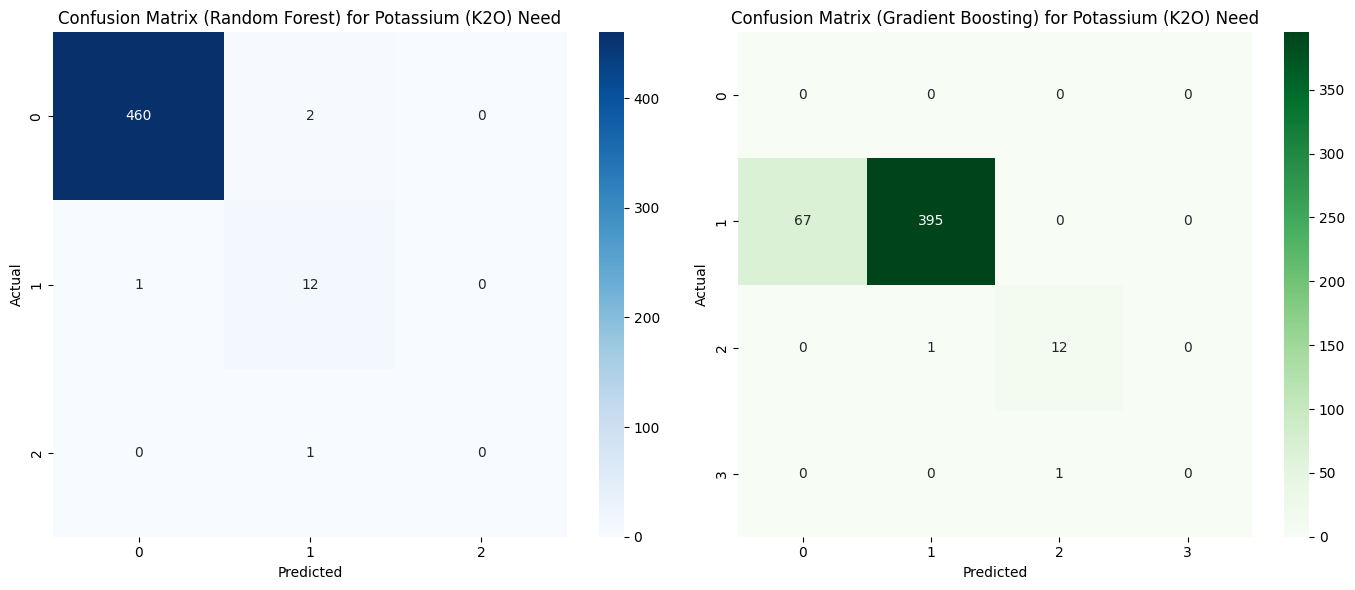

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load your dataset from an Excel file, starting from the second row
df = pd.read_excel('/home/space/Project01/docs/Editted list.xlsx')  # Replace with the actual path


# Define the input features and output target columns
features = ['Crop Name', 'Target Yield', 'Field Size',
            'pH (water)', 'Organic Carbon', 'Total Nitrogen', 'Phosphorus (M3)',
            'Potassium (exch.)', 'Soil moisture']
output_columns = ['Nitrogen (N) Need', 'Phosphorus (P2O5) Need', 'Potassium (K2O) Need']

# Ensure all specified columns exist in the DataFrame
missing_features = [col for col in features if col not in df.columns]
missing_outputs = [col for col in output_columns if col not in df.columns]

if missing_features or missing_outputs:
    print("Missing features:", missing_features)
    print("Missing output columns:", missing_outputs)
else:
    # Input features
    X = df[features].copy()
    y = df[output_columns].copy()

    # Combine X and y to drop rows with NaN values in either
    combined = pd.concat([X, y], axis=1)
    combined.dropna(inplace=True)

    # Separate X and y again after dropping NaNs
    X = combined[features]
    y = combined[output_columns]

    # One-hot encode categorical features
    X = pd.get_dummies(X, columns=['Crop Name'])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42)
    }

    performance_metrics = {}

    for model_name, model in models.items():
        print(f"\nModel: {model_name}")

        # Train the model for each output variable separately and evaluate
        model_metrics = {}
        for output_col in output_columns:
            # Train the model
            model.fit(X_train, y_train[output_col])

            # Predict on the test set
            y_pred = model.predict(X_test)

            # Evaluate the model
            mse = mean_squared_error(y_test[output_col], y_pred)
            r2 = r2_score(y_test[output_col], y_pred)

            print(f"Target Variable: {output_col}")
            print(f"Mean Squared Error: {mse}")
            print(f"R^2 Score: {r2}")
            print()

            # Store performance metrics
            model_metrics[output_col] = {'MSE': mse, 'R2': r2}

        performance_metrics[model_name] = model_metrics

    # Plot comparison of MSE and R^2 scores
    mse_scores = {model_name: [metrics['MSE'] for metrics in output_metrics.values()] for model_name, output_metrics in performance_metrics.items()}
    r2_scores = {model_name: [metrics['R2'] for metrics in output_metrics.values()] for model_name, output_metrics in performance_metrics.items()}

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # MSE plot
    for model_name, scores in mse_scores.items():
        axs[0].plot(output_columns, scores, label=model_name)
    axs[0].set_title('Mean Squared Error Comparison')
    axs[0].set_xlabel('Target Variable')
    axs[0].set_ylabel('MSE')
    axs[0].legend()

    # R^2 plot
    for model_name, scores in r2_scores.items():
        axs[1].plot(output_columns, scores, label=model_name)
    axs[1].set_title('R^2 Score Comparison')
    axs[1].set_xlabel('Target Variable')
    axs[1].set_ylabel('R^2')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

    # Function to make predictions for new data
    def predict_nutrient_needs(model, input_data):
        input_df = pd.DataFrame(input_data)
        input_df = pd.get_dummies(input_df, columns=['Crop Name'])
        for col in X.columns:
            if col not in input_df.columns:
                input_df[col] = 0  # Add missing columns with default value 0
        input_df = input_df[X.columns]  # Ensure the same column order as training data
        predictions = model.predict(input_df)
        return predictions

    # Example input data for prediction
    new_data = {
        'Crop Name': ['apple'],  # Example crop name
        'Target Yield': [150.0],  # Example target yield
        'Field Size': [1.0],  # Example field size
        'pH (water)': [6.7],  # Example pH
        'Organic Carbon': [12.9],  # Example organic carbon
        'Total Nitrogen': [1.1],  # Example total nitrogen
        'Phosphorus (M3)': [2.3],  # Example phosphorus
        'Potassium (exch.)': [3.6],  # Example potassium
        'Soil moisture': [24]  # Example soil moisture
    }

    # Make predictions for the new input data using the Random Forest model
    rf_predictions = predict_nutrient_needs(models['Random Forest'], new_data)
    gb_predictions = predict_nutrient_needs(models['Gradient Boosting'], new_data)

    print("Predicted nutrient needs (Random Forest):")
    print(rf_predictions)

    print("Predicted nutrient needs (Gradient Boosting):")
    print(gb_predictions)

    # Save the models using joblib
    joblib.dump(models['Random Forest'], 'random_forest_model.joblib')
    joblib.dump(models['Gradient Boosting'], 'gradient_boosting_model.joblib')

    # Plot confusion matrix for binned outputs (example for Random Forest and Nitrogen (N) Need)
    for output_col in output_columns:
        bins = np.linspace(min(y_test[output_col]), max(y_test[output_col]), 5)  # Adjust bin edges as necessary
        y_test_binned = np.digitize(y_test[output_col], bins)
        y_pred_binned_rf = np.digitize(models['Random Forest'].predict(X_test), bins)
        y_pred_binned_gb = np.digitize(models['Gradient Boosting'].predict(X_test), bins)

        cm_rf = confusion_matrix(y_test_binned, y_pred_binned_rf)
        cm_gb = confusion_matrix(y_test_binned, y_pred_binned_gb)

        fig, ax = plt.subplots(1, 2, figsize=(14, 6))
        
        sns.heatmap(cm_rf, annot=True, fmt='d', ax=ax[0], cmap='Blues')
        ax[0].set_title(f'Confusion Matrix (Random Forest) for {output_col}')
        ax[0].set_xlabel('Predicted')
        ax[0].set_ylabel('Actual')

        sns.heatmap(cm_gb, annot=True, fmt='d', ax=ax[1], cmap='Greens')
        ax[1].set_title(f'Confusion Matrix (Gradient Boosting) for {output_col}')
        ax[1].set_xlabel('Predicted')
        ax[1].set_ylabel('Actual')

        plt.tight_layout()
        plt.show()
